In [2]:
import src.dataset as dataset
import logging
import pandas as pd

/Users/mkrtichhovsepyan/Desktop/AUTO/acim-happiness/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
M_D = dataset.MarriageDataset.from_kaggle()
marriage = M_D['DATA1']

In [9]:
marriage.rename(columns={'Country/region': 'country'}, inplace=True)

In [10]:
HAPPY = dataset.HappinessDataset.from_kaggle()
happiness_data = HAPPY[2023]

In [12]:
marriage_happiness = pd.merge(marriage, happiness_data, on='country')

In [13]:
marriage_happiness

,country,Continent,Marriage,Divorce,Actual,Percent,Data Source Year,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Albania,Europe,8.1,1.7,4.76,20.99,(2018),Central and Eastern Europe,5.277,1.449,0.951,0.480,0.549,0.133,0.037
1,Algeria,Africa,10.1,1.6,6.31,15.84,(2013),Middle East and North Africa,5.329,1.353,1.298,0.409,0.252,0.073,0.152
2,Armenia,Europe,6.0,1.0,6.00,16.67,(2011),Central and Eastern Europe,5.342,1.466,1.134,0.443,0.551,0.053,0.160
3,Australia,Oceania,4.6,2.0,2.30,43.48,(2017),North America and ANZ,7.095,1.899,1.497,0.532,0.677,0.242,0.310
4,Austria,Europe,5.3,1.8,2.94,33.96,(2018),Western Europe,7.097,1.927,1.382,0.535,0.630,0.191,0.310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,United States,North America,5.1,2.3,2.22,45.10,(2020),North America and ANZ,6.894,1.980,1.460,0.390,0.557,0.210,0.172
77,Uruguay,South America,3.2,NaN,NaN,NaN,(2010),Latin America and Caribbean,6.494,1.617,1.445,0.435,0.683,0.102,0.254
78,Uzbekistan,Asia,7.8,1.1,7.09,14.10,(2006),Commonwealth of Independent States,6.014,1.227,1.347,0.375,0.740,0.260,0.208
79,Venezuela,South America,3.3,1.2,2.75,36.36,(2006),Latin America and Caribbean,5.211,0.000,1.257,0.341,0.369,0.205,0.084


                              Marriage   Divorce    Actual   Percent  \
Marriage                      1.000000  0.149512  0.499105 -0.516858   
Divorce                       0.149512  1.000000 -0.624849  0.631972   
Actual                        0.499105 -0.624849  1.000000 -0.792584   
Percent                      -0.516858  0.631972 -0.792584  1.000000   
happiness_score              -0.442043  0.234482 -0.400480  0.366349   
gdp_per_capita               -0.298875  0.296131 -0.402465  0.385495   
social_support               -0.382767  0.240014 -0.372874  0.378283   
healthy_life_expectancy      -0.293309  0.194256 -0.382428  0.374381   
freedom_to_make_life_choices -0.278214  0.027385 -0.083661  0.159722   
generosity                   -0.090766  0.008576 -0.019652  0.020630   
perceptions_of_corruption    -0.096220  0.216770 -0.202662  0.231869   

                              happiness_score  gdp_per_capita  social_support  \
Marriage                            -0.442043       -0

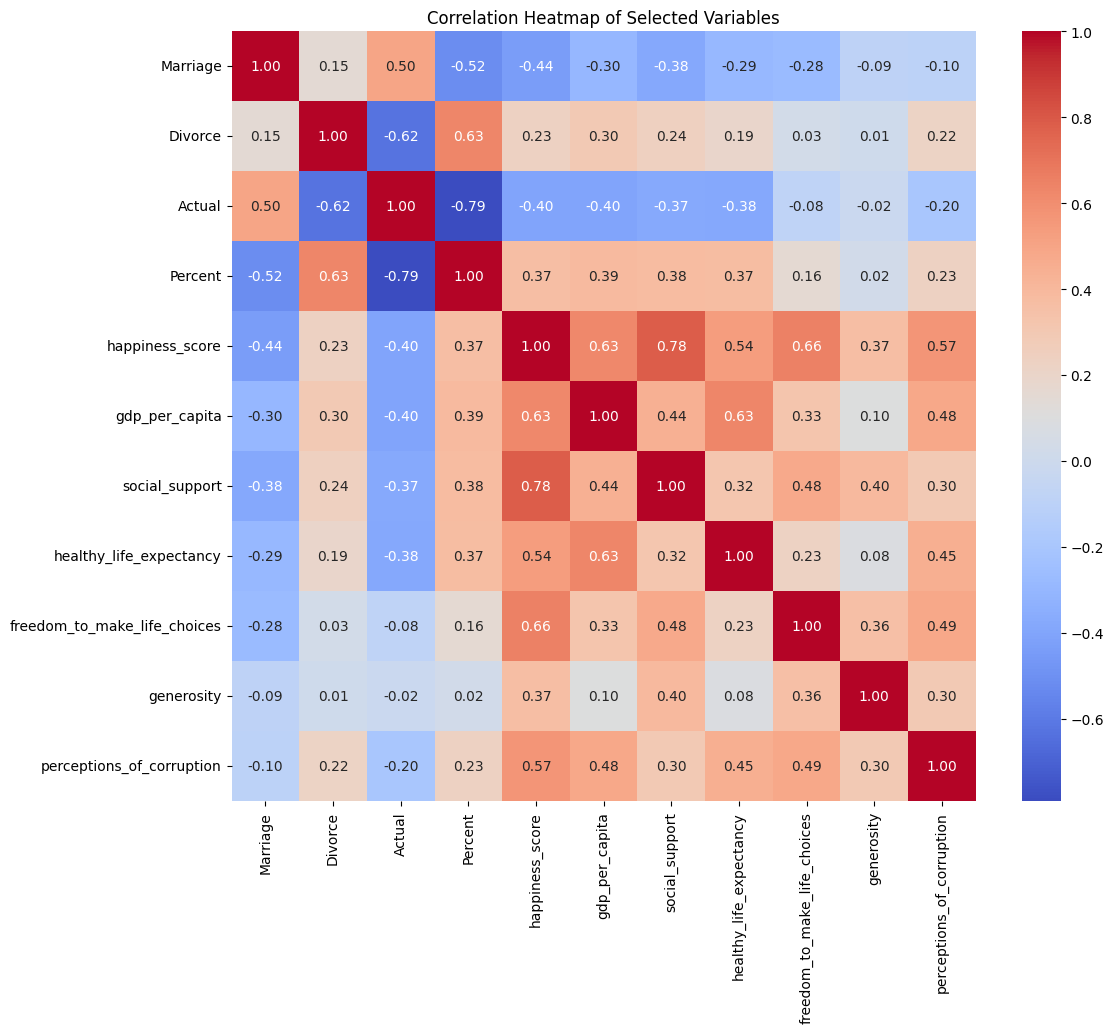

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming marriage_happiness is your DataFrame
# Select the specified columns
selected_columns = [
    'Marriage', 'Divorce', 'Actual', 'Percent', 'happiness_score',
    'gdp_per_capita', 'social_support', 'healthy_life_expectancy',
    'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption'
]

# Ensure only the numeric columns are used for correlation calculation
numeric_columns = [
    'Marriage', 'Divorce', 'Actual', 'Percent', 'happiness_score',
    'gdp_per_capita', 'social_support', 'healthy_life_expectancy',
    'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption'
]

# Select only the numeric columns for correlation calculation
numeric_df = marriage_happiness[numeric_columns]
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Variables')
plt.show()

In [54]:
# Calculate the correlation matrix
corr_matrix = data.corr()
# Visualize the correlation matrix using Plotly
fig_heatmap = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale='RdBu',
    zmin=-1,
    zmax=1,
    title='Correlation Matrix of Selected Variables',
    labels=dict(x="", y="")
)


fig_heatmap.show()

## Does getting married make people happier, or does it just double their laundry? (Explore the relationship between marriage rates and happiness scores)

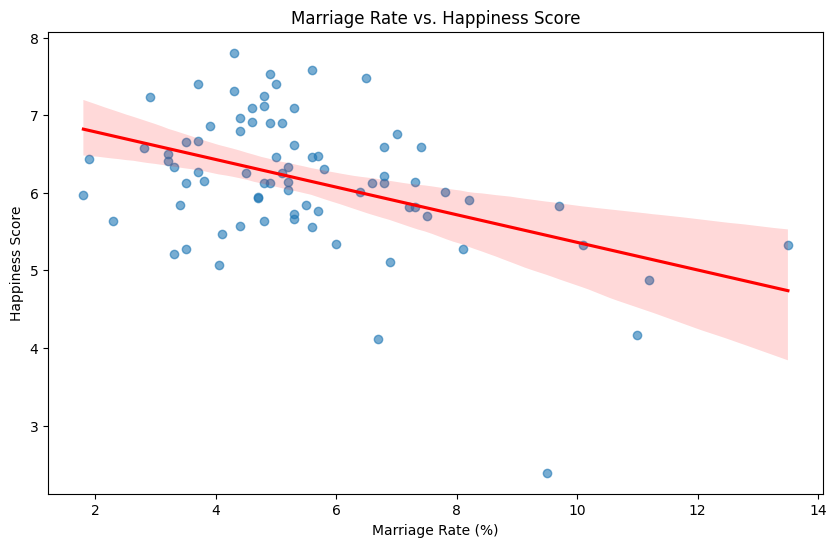

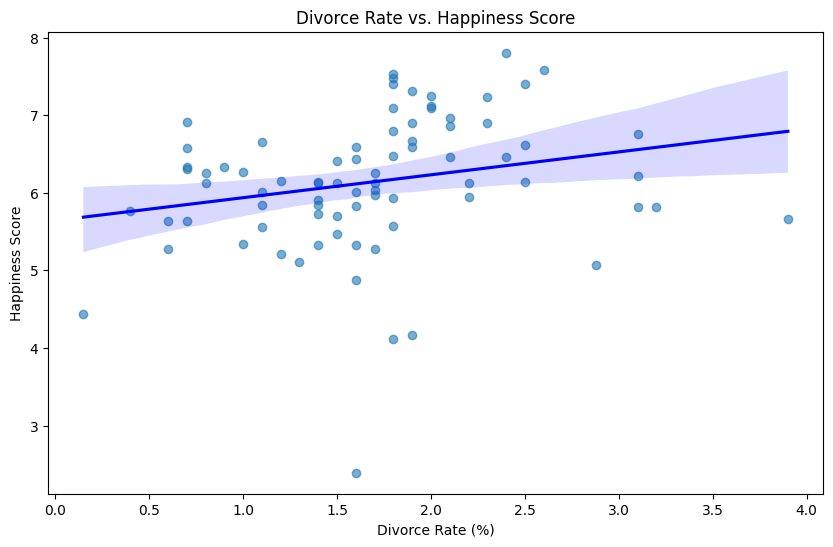

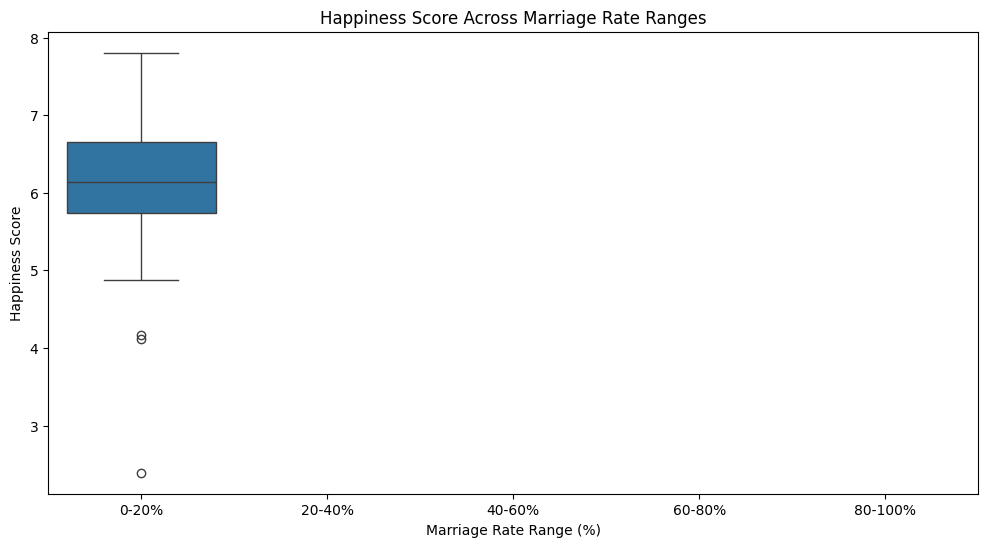

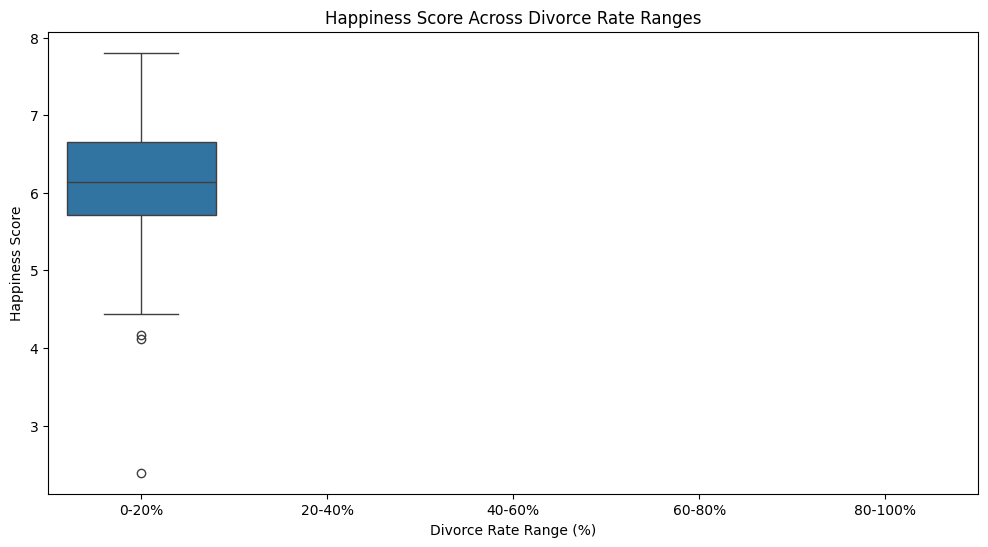

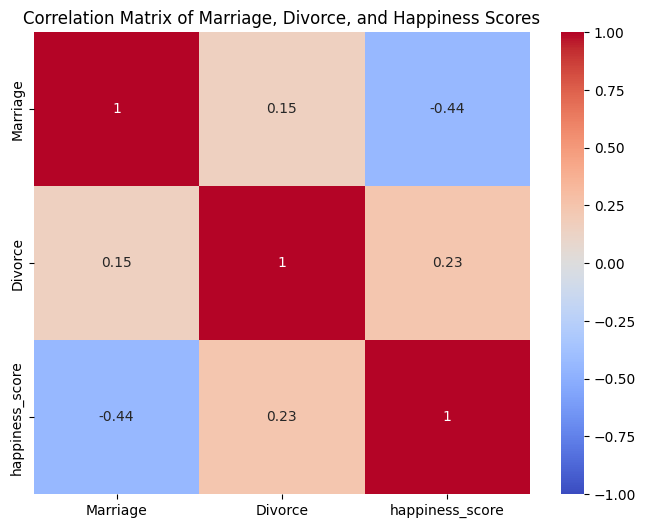

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# 1. Scatter Plot with Regression Line: Marriage Rate vs. Happiness Score
plt.figure(figsize=(10, 6))
sns.regplot(x='Marriage', y='happiness_score', data=marriage_happiness, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Marriage Rate vs. Happiness Score')
plt.xlabel('Marriage Rate (%)')
plt.ylabel('Happiness Score')
plt.show()

# 2. Scatter Plot with Regression Line: Divorce Rate vs. Happiness Score
plt.figure(figsize=(10, 6))
sns.regplot(x='Divorce', y='happiness_score', data=marriage_happiness, scatter_kws={'alpha': 0.6}, line_kws={'color': 'blue'})
plt.title('Divorce Rate vs. Happiness Score')
plt.xlabel('Divorce Rate (%)')
plt.ylabel('Happiness Score')
plt.show()

# 3. Box Plot: Happiness Score Across Marriage Rate Ranges
bins = [0, 20, 40, 60, 80, 100]  # Adjust bin ranges as appropriate
labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']
marriage_happiness['marriage_range'] = pd.cut(marriage_happiness['Marriage'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(12, 6))
sns.boxplot(x='marriage_range', y='happiness_score', data=marriage_happiness, order=labels)
plt.title('Happiness Score Across Marriage Rate Ranges')
plt.xlabel('Marriage Rate Range (%)')
plt.ylabel('Happiness Score')
plt.show()

# 4. Box Plot: Happiness Score Across Divorce Rate Ranges
bins = [0, 20, 40, 60, 80, 100]  # Adjust bin ranges as appropriate
labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']
marriage_happiness['divorce_range'] = pd.cut(marriage_happiness['Divorce'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(12, 6))
sns.boxplot(x='divorce_range', y='happiness_score', data=marriage_happiness, order=labels)
plt.title('Happiness Score Across Divorce Rate Ranges')
plt.xlabel('Divorce Rate Range (%)')
plt.ylabel('Happiness Score')
plt.show()

# 5. Heatmap of Correlations
corr_matrix = marriage_happiness[['Marriage', 'Divorce', 'happiness_score']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Marriage, Divorce, and Happiness Scores')
plt.show()

In [43]:
import plotly.express as px

# Interactive Joint Plot: Marriage Rate vs. Happiness Score
fig_joint = px.scatter(
    marriage_happiness,
    x='Marriage',
    y='happiness_score',
    color='Divorce',
    size='gdp_per_capita',
    hover_name='country',
    marginal_x='histogram',
    marginal_y='histogram',
    trendline='ols',
    title='Marriage Rate vs. Happiness Score',
    labels={'Marriage': 'Marriage Rate (%)', 'happiness_score': 'Happiness Score', 'Divorce': 'Divorce Rate (%)'},
    template='plotly_white'
)

fig_joint.update_layout(
    height=700,
    width=1000,
    legend_title='Divorce Rate (%)'
)

fig_joint.show()

In [50]:
import plotly.express as px

# Interactive Box Plot with Jitter: Happiness Score Across Marriage Rate Ranges
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']
marriage_happiness['marriage_range'] = pd.cut(marriage_happiness['Marriage'], bins=bins, labels=labels, include_lowest=True)

fig_box_jitter = px.box(
    marriage_happiness,
    x='marriage_range',
    y='happiness_score',
    color='marriage_range',
    points='all',
    hover_data=['country', 'Marriage', 'happiness_score'],
    title='Happiness Score Across Marriage Rate Ranges',
    labels={'marriage_range': 'Marriage Rate Range (%)', 'happiness_score': 'Happiness Score'},
    template='plotly_white'
)

fig_box_jitter.update_layout(
    showlegend=False,
    xaxis_title='Marriage Rate Range (%)',
    yaxis_title='Happiness Score',
    height=600,
    width=1000
)

fig_box_jitter.show()